# CSMODEL
### Project 1 - Group 5
Members:
- Alon-alon, Jason Miguel E.
- Escalona, Jose Miguel A.
- Llorca, Marcelino Francis S.

### 1. Dataset Representation

- About the Dataset<br>

    **The data was sourced from the collection of Our World in Data (OWID).** The file contains different data values that could help paint a better image of the world's and every country's statuses for COVID-19. The version used in this project will be the **July 15, 2021 release of the dataset, however OWID attempts both daily and weekly update of data whenever possible, thus ensuring that the data they provide is the latest possible, therefore any conclusions made in this notebook may have changed drastically in accordance to the latest dataset available.** Effectively, the attribute of time, makes the data chronologically dependent.
<br>
- Collection Process and its Implications<br>

    The collection was done by the Our World in Data Group which is a research group that focuses on research and aggregation of data in a single accessible repository for the purposes of getting a better picture or even solving world problems that can benefit all of mankind. For the specific dataset, **they made use of all possible available data that is publicly released by governments of all nations and different international organizations in the world.** According to OWID, the data was collected from the following sources which include:

1. COVID-19 Data Repository of Johns Hopkins University
2. National Government Reports
3. Oxford COVID-19 Government Response Tracker, Blavatnik School of Government (Stringency Index)
4. United Nations Data (for demographics related data)
5. World Bank Data (for demographics related data)

    The data implies that the data presented assumes to be the latest data possible, with **its validity and reliability (specifically for case, death, recovery, and vaccination numbers) ultimately depending on each reporting government's transparency and accuracy with the data they are reporting** publicly and to John Hopkins University. Any report submitted to John Hopkins or scraped by OWID may not necessarily taken as the date of entry for the virus (i.e. a case) in the country but rather could be a report with the testing a country has done as a form of a preventative measure, however it is more likely to be a case than a non-case report.
<br>    
- Structure of Dataset of the File<br>

    The dataset's structure consists of **102,475 observations with 60 variables available**. The structure goes on every country's date when it reported either its first COVID-19 case or first COVID-19 test. The dataset was already distributed publicly on a single file containing all of the relevant information possible. There is however other datasets which contain specific and specialized versions of the current dataset we are using that is also available for use on OWID's Github repository.
    
    | iso_code | continent | location | date | data1 | ... | dataX |
    | --- | --- | --- | --- | --- | --- | --- |
    | PHL | Asia | Philippines | 0000-00-01 | data | ... | dataX |
    | PHL | Asia | Philippines | 0000-00-02 | data | ... | dataX |
    | JPN | Asia | Japan | 0000-00-01 | data | ... | dataX |
    | JPN | Asia | Japan | 0000-00-02 | data | ... | dataX |
    | JPN | Asia | Japan | 0000-01-01 | data | ... | dataX |
    | JPN | Asia | Japan | 0000-01-02 | data | ... | dataX |
    | SGP | Asia | Singapore | 0000-00-01 | data | ... | dataX |
    | SGP | Asia | Singapore | 0000-00-02 | data | ... | dataX |
    | SGP | Asia | Singapore | 0000-00-03 | data | ... | dataX |

    The list of locations are a mixture of continents and actual countries, as recognized by OWID, which may or may not be legally recognized by the international community which will be cleaned and selected from to specify the scope of the study.
<br>    
- About the Variables<br>
    
    The dataset has 60 variables, **most of which relate to COVID-19 related numbers such as cases, deaths, recoveries, vaccinations among others, as well as demographic data such as GDP per capita, HDI, median age, population, population density among others**. Most of the data that is available in **the DataFrame is made up of numeric values (via float64) and some string values (via object).** Most of the data are as raw as it can be with variables like the new and total cases, deaths, and recoveries while others are pre-treated or scaled for easy reading such as those that have 'per million' or 'smoothed' in the variable names. Knowing this, it is better to stay away from those pre-treated values to attain the most realistic insights as possible albeit at the expense of doing the data cleaning ourselves. It is also worth noting that not all variables will be expected to be used as it is often times for a much more specific and specialize analysis that most experts may use.

In [1]:
print("LOADING LIBRARIES...")
import math #MATH
import re #REGEX
import numpy as np #NUMPY
import pandas as pd #PANDAS
import matplotlib.pyplot as plt #PLOT MATPLOTLIB
import scipy.stats as stat

bar = "================================="
automated = True #Manual entry or pre-defined entries
print("AUTOMATED MODE:",automated)

raw_df = None
if(not automated):
    filename = input("Enter Filename of CSV file (including .csv): ")
    raw_df = pd.read_csv(filename)
else:
    raw_df = pd.read_csv("COVID_7_15.csv")
    
minDate = '2020-04-01'
maxDate = '2021-06-30'

print("Raw Dataframe Shape:", raw_df.shape,"\n",bar)
raw_df.info()

LOADING LIBRARIES...
AUTOMATED MODE: True
Raw Dataframe Shape: (102475, 60) 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102475 entries, 0 to 102474
Data columns (total 60 columns):
 #   Column                                 Non-Null Count   Dtype  
---  ------                                 --------------   -----  
 0   iso_code                               102475 non-null  object 
 1   continent                              97689 non-null   object 
 2   location                               102475 non-null  object 
 3   date                                   102475 non-null  object 
 4   total_cases                            98594 non-null   float64
 5   new_cases                              98591 non-null   float64
 6   new_cases_smoothed                     97581 non-null   float64
 7   total_deaths                           88371 non-null   float64
 8   new_deaths                             88527 non-null   float64
 9   new_deaths_smoothed                    97581 non

### 2. Data Cleaning

Given that there are a lot of nations and variables to consider, it has been decided to reduce to scope of nations to just the ASEAN nations as well as the World as a baseline. The consideration for ASEAN nations was made because of the following reasons:
1. Near proximity
2. Economic integration
3. Similar level economies and populations
This could help us determine the COVID-19 status of the Philippines to its neighbors.

Certain columns are to be ommitted since it is not needed but also of the fact that contains: pre-treated values, specialized values, or varying values (in terms of the unit of measurement). The columns that were retained:

|Column/Variable|Definition|From|
|---|---|---|
|total_cases|Total confirmed cases of COVID-19|COVID-19 Data Repository by the Center for Systems Science and Engineering (CSSE) at Johns Hopkins University
|new_cases|New confirmed cases of COVID-19|COVID-19 Data Repository by the Center for Systems Science and Engineering (CSSE) at Johns Hopkins University
|total_deaths|Total deaths attributed to COVID-19|COVID-19 Data Repository by the Center for Systems Science and Engineering (CSSE) at Johns Hopkins University
|new_deaths|New deaths attributed to COVID-19|COVID-19 Data Repository by the Center for Systems Science and Engineering (CSSE) at Johns Hopkins University
|total_vaccinations|Total number of COVID-19 vaccination doses administered|National government reports
|people_vaccinated|Total number of people who received at least one vaccine dose|National government reports
|people_fully_vaccinated|Total number of people who received all doses prescribed by the vaccination protocol|National government reports
|new_vaccinations|New COVID-19 vaccination doses administered (only calculated for consecutive days)|National government reports
|stringency_index|Government Response Stringency Index: composite measure based on 9 response indicators including school closures, workplace closures, and travel bans, rescaled to a value from 0 to 100 (100 = strictest response)|Oxford COVID-19 Government Response Tracker, Blavatnik School of Government
|population|Population in 2020|United Nations, Department of Economic and Social Affairs, Population Division, World Population Prospects 2019 Revision|

The script below crunches the raw data and produces a covid_df containing:
1. ASEAN COVID-19 Data (Containing 10 Countries, including the Philippines)
2. Philippine COVID-19 Data

Do note for the ASEAN COVID-19 data, any observation on a certain day that does not meet the required number of observations (i.e. the number countries that reported that day) will be automatically omitted from the resulting group DataFrame. This was done in order to prevent flucuations in the resulting data which mostly are computed by mean or sum, where quantity matters for both operations.

In [2]:
#CSMODEL: COVID-19 Dataset
#Crunches data of selected countries to a grouped one

#GLOBAL VARIABLES
checkpoint = False
print("CHECKPOINT:",checkpoint)
NaN = float("nan")
group_pop = 0 #Placeholder for the population of group of nations specified.

#CUSTOM FUNCTIONS
def listDates(df): #Sorts the 'date' column of a given DataFrame and returns it.
    return np.sort((df['date'].unique()),kind='mergesort')
def fillZeros(size): #Returns a list of zeros from a specified size
    return np.zeros(size).tolist()
def writeCheckpoint(df, filename): #Writes a given DataFrame to a CSV file
    if(checkpoint):
        print("WRITING CHECKPOINT...")
        df.to_csv(filename+".csv",index=False)
        print("Checkpoint Complete:",filename)
def aggregator(src_df,iso_code,continent,location,count): #Aggregates the given DataFrame to a grouped version on specific columns; O(nm)
    tmp_df = pd.DataFrame(columns=toRetain) 
    for i in range(dateCount):
        sp_date = date_values[i] #Specified date
        filtered_df = src_df[src_df['date']==sp_date] #Series of nations with specified date
        if(filtered_df.shape[0] == count): #Will run only if all countries listed are there
            id = [iso_code,continent,location,sp_date] #Default identifiers for ASEAN
            data = fillZeros(len(toRetainData))
            for j in range(filtered_df.shape[0]):
                #add current data with the retrieved data
                retrieve = filtered_df[toRetainData].iloc[j].tolist()
                data = list(map(lambda x,y:x+y,retrieve,data)) #sum
            targets = [1,3,7,8,9] #target variables to set as mean
            for i in range(len(targets)):
                data[targets[i]] = data[targets[i]]/count
            result = id+data
            tmp_df.loc[tmp_df.shape[0]] = result #"ADDS" THE RESULTING LIST AT THE END OF THE DATAFRAME
    return tmp_df
def dateRange(df): #Finds the lowest and highest date recorded.
    date_values = np.sort(df['date'].unique(),kind='mergesort')
    return [date_values[0], date_values[len(date_values)-1]] #the latest possible data maybe incomplete thus the day prior the latest will be used
def nullCounter(df):
    for i in range(len(df.columns.tolist())):
        print(df.columns.tolist()[i],df[df.columns.tolist()[i]].isnull().sum(),"/",df.shape[0])

#PREPARE FILES AND RAW DATAFRAME
covid_df = raw_df.copy(deep=True)
#Raw file reading: make use of covid_df.readline() to retrieve a str line (as str) from

#DATE SORTING AND VALUES
date_values = listDates(covid_df)
dateCount = date_values.size

#COLUMNS TO RETAIN
toRetain = ['iso_code','continent','location','date','total_cases','new_cases','total_deaths',
            'new_deaths','total_vaccinations','people_vaccinated','people_fully_vaccinated',
            'new_vaccinations','stringency_index','population']
toRetainData = toRetain[4:]
identifiers = toRetain[0:4]
#LIST OF COUNTRIES TO RETAIN
targetCountries = ['PHL','BRN','KHM','IDN','SGP','LAO','THA','MYS','MMR','VNM']

#nullCounter(covid_df)

#DROP COLUMNS
print("DROPPING COLUMNS...")
toDrop = list(set(covid_df.columns.tolist()) - set(toRetain))
covid_df = covid_df.drop(columns=toDrop)

#FILTERING COUNTRIES
print("FILTERING COUNTRIES...")
ph_df = covid_df[covid_df['iso_code']=='PHL'] #PH ONLY
covid_df = covid_df[covid_df['iso_code'].str.contains(re.compile('|'.join(targetCountries)),regex=True)] #ASEAN NATIONS; YOU CAN CHANGE LIST OF COUNTRIES TO FOCUS

#FIND TOTAL POPULATION OF ASEAN
pop = covid_df[covid_df['date']==dateRange(covid_df)[1]]
if(pop.shape[0] != len(targetCountries)): #REFERENCES TO targetCountries
    print("COUNTRIES!=",len(targetCountries),"AT MAX DATE!")
    exit()
group_pop = pop['population'].sum()

#READING CONENTS OF EACH OBSERVATION AVAILABLE OF ALL COUNTRIES AVAILABLE ON A GIVEN DATE 
#WILL MAKE USE OF THE CURRENT LIST OF COUNTRIES AVAILABLE AT covid_df.
print("AGGREGATING ASEAN COUNTRIES...")
group_df = aggregator(covid_df,"MDL_SEA",NaN,"Asia",len(targetCountries)) #Will hold the resulting aggregation of ASEAN countries

#ASEAN Checkpoint
writeCheckpoint(group_df,"asean_checkpoint")

#Combined dataframes
print("Available iso_codes:",pd.concat([covid_df,group_df])['iso_code'].unique())
print("Available columns:",toRetain)
print("FILE PROCESSING COMPLETE!")

print("DATAFRAMES AVAILABLE FOR USE: covid_df, group_df, ph_df")

CHECKPOINT: False
DROPPING COLUMNS...
FILTERING COUNTRIES...
AGGREGATING ASEAN COUNTRIES...
Available iso_codes: ['BRN' 'KHM' 'IDN' 'LAO' 'MYS' 'MMR' 'PHL' 'SGP' 'THA' 'VNM' 'MDL_SEA']
Available columns: ['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases', 'total_deaths', 'new_deaths', 'total_vaccinations', 'people_vaccinated', 'people_fully_vaccinated', 'new_vaccinations', 'stringency_index', 'population']
FILE PROCESSING COMPLETE!
DATAFRAMES AVAILABLE FOR USE: covid_df, group_df, ph_df


It is worth nothing that there exists NaN values in the DataFrame, but it won't be replaced with zero value as it may affect certain results of some operations and will rather just be dropped as needed.

**The following dataframes could be used for the proceeding code:**
- *covid_df* = Choosen Countries COVID data (ASEAN in this case)
- *group_df* = Overall ASEAN COVID data
- *ph_df* = Philippine COVID data

In [3]:
#Sorting DataFrames by Date
def minmaxDates(capsule, capsule_str):
    for i in range(len(capsule)):
        print(capsule_str[i],":",capsule[i]['date'].iloc[0],"→",capsule[i]['date'].iloc[capsule[i].shape[0]-1])

covid_df.sort_values(by='date')
group_df.sort_values(by='date')
ph_df.sort_values(by='date')

capsule = [covid_df, group_df, ph_df]
capsule_str = ['covid_df','group_df','ph_df']

minmaxDates(capsule,capsule_str)

covid_df : 2020-03-09 → 2021-07-14
group_df : 2020-03-27 → 2021-07-14
ph_df : 2020-01-30 → 2021-07-14


Based from the output above, the only valid data that is possible to use are those **starting April of 2020 up to June of 2021.** This is because of the differences in the starting reporting date of different countries in the region.

In [4]:
#DROPPING OBSERVATIONS THAT FALL BELOW THE RECOMMENDED MINIMUM DATE
#Refer to Data Retrieval for minDate and maxDate
covid_df = covid_df[(covid_df['date'] >= minDate) & (covid_df['date'] <= maxDate)]
group_df = group_df[(group_df['date'] >= minDate) & (group_df['date'] <= maxDate)]
ph_df = ph_df[(ph_df['date'] >= minDate) & (ph_df['date'] <= maxDate)]

capsule = [covid_df, group_df, ph_df]
minmaxDates(capsule,capsule_str)

print("")
for i in range(len(capsule)):
    print(capsule_str[i],":",capsule[i].shape)
    
#ADDING year_month ON ALL DATAFRAMES
covid_df['year_month'] = covid_df['date'].str[:7]
ph_df['year_month'] = ph_df['date'].str[:7]
group_df['year_month'] = group_df['date'].str[:7]

covid_df : 2020-04-01 → 2021-06-30
group_df : 2020-04-01 → 2021-06-30
ph_df : 2020-04-01 → 2021-06-30

covid_df : (4560, 14)
group_df : (456, 14)
ph_df : (456, 14)


The dataframe *covid_df* contains 10 countries thus ***covid_df* has effectively 4560 observations**, with *ph_df* and *group_df* being equal at 456 observations (representing 1 country/region). This means that all dataframes are already "synchronized" on a date range which could helping in elimnating outliers or any data from other countries on a date range that a specific country has not reported on.

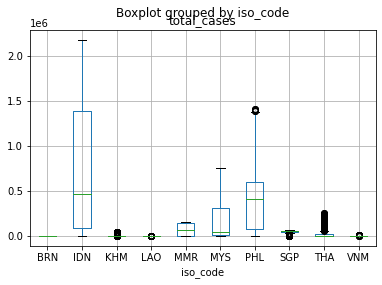

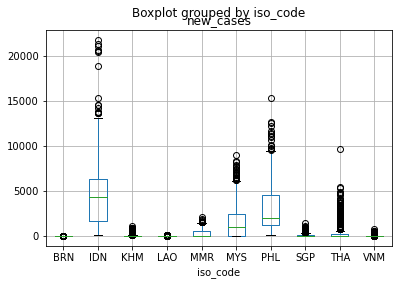

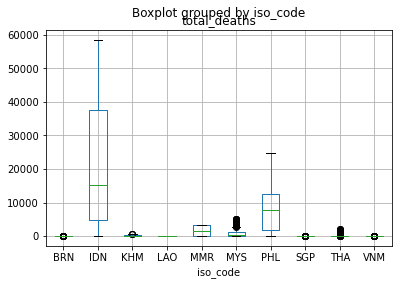

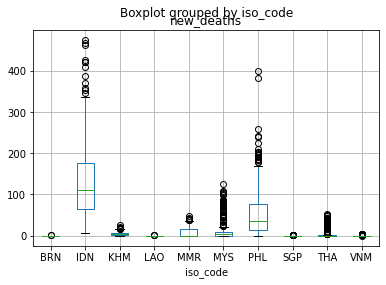

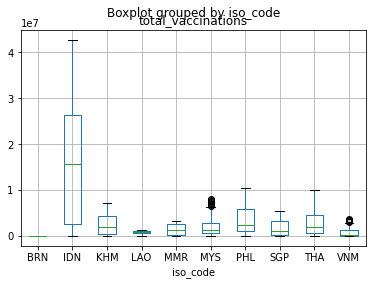

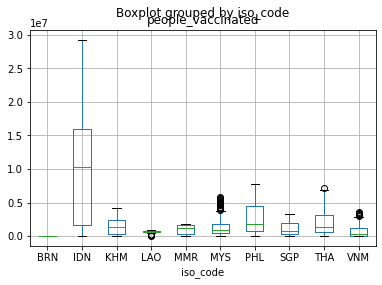

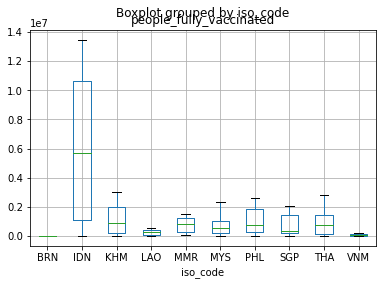

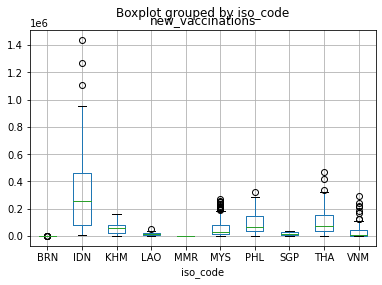

In [5]:
for i in range (len(toRetainData)-2):
    covid_df.boxplot(column=toRetainData[i], by="iso_code", figsize=(6,4))

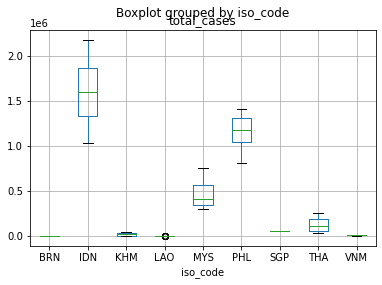

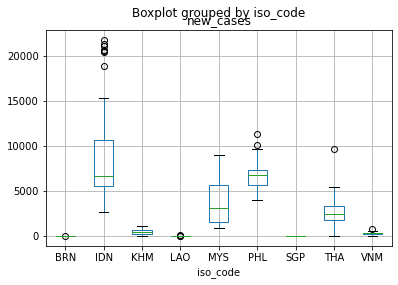

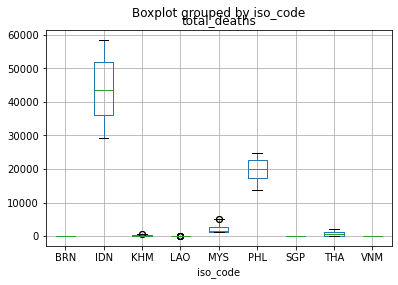

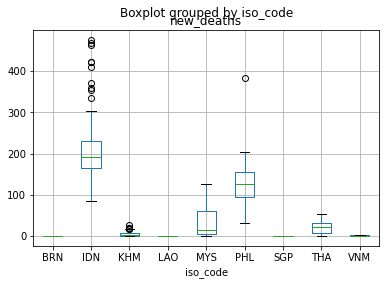

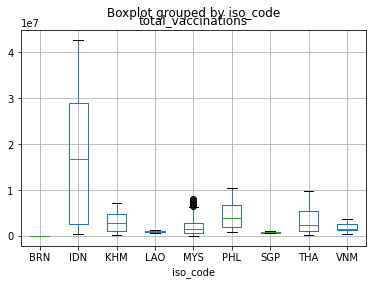

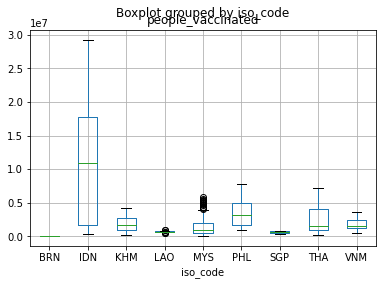

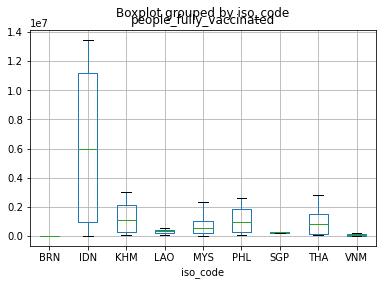

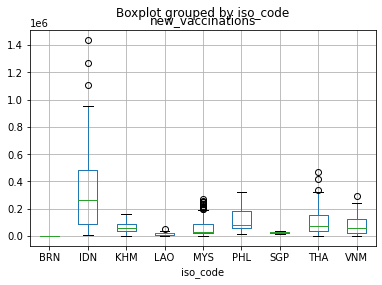

In [6]:
#Checking for suspected outliers (visually)
vis_df = covid_df.dropna()
for i in range (len(toRetainData)-2):
    vis_df.boxplot(column=toRetainData[i], by="iso_code", figsize=(6,4))

Comparing the two, the is a significant number of outliers in the data where the DataFrame did not drop the NaN values than those that did but the DataFrame that did drop NaN values have a higher overall plot than the other. This implies that the usage of the *dropna()* shall be used with a heavy consideration.

### 3. Exploratory Data Analysis

Before the discussion regarding the EDA Questions, the data shall be explored as on an as-is basis to see what do the following contents of the DataFrame show.

**COVID-19 New Case Numbers**

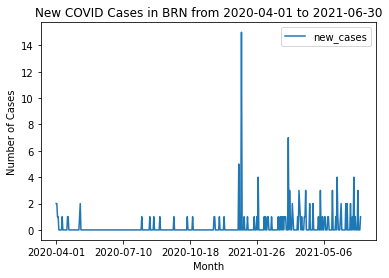

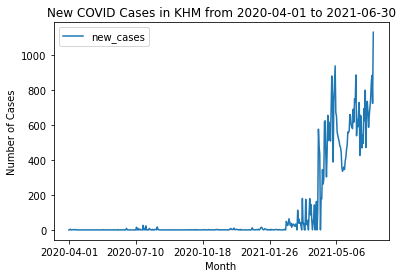

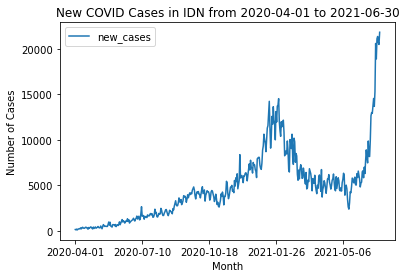

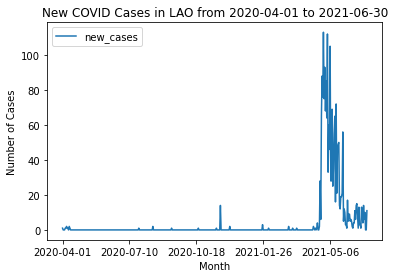

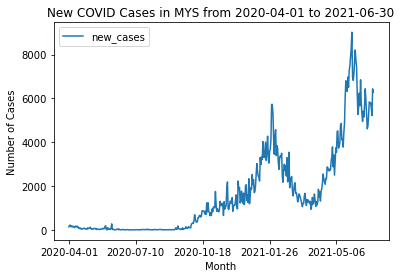

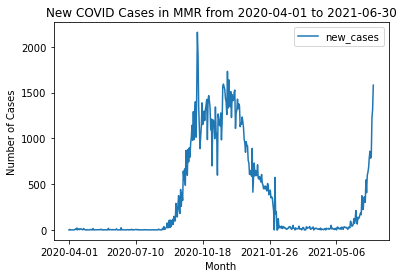

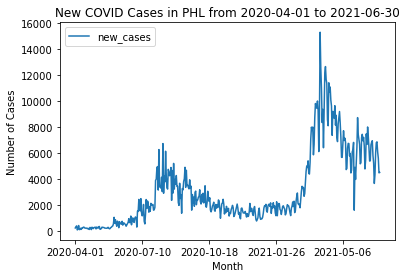

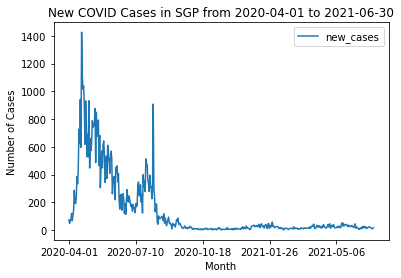

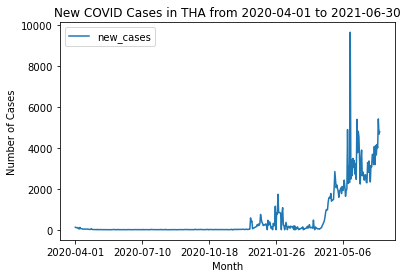

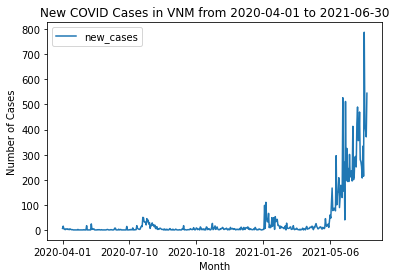

In [7]:
#Returns a line chart based on a country from the covid_df
eda_df = covid_df[['iso_code','date','new_cases']]

def createCountryLineChart(df,iso_code, x_param, y_param, xlabel, ylabel, chart_title):
    df[df["iso_code"] == iso_code].plot(x=x_param, y=y_param, figsize=(6, 4),
                                        kind='line',xlabel=xlabel,ylabel=ylabel,
                                        title=chart_title,layout=(3,4))

for i in range(covid_df['iso_code'].unique().size):
    createCountryLineChart(eda_df, covid_df['iso_code'].unique()[i], "date", "new_cases", "Month", "Number of Cases", "New COVID Cases in "+covid_df['iso_code'].unique()[i]+" from "+str(minDate)+" to "+str(maxDate))

**It could be observed that the majority of the ASEAN nations (including the Philippines) experience a definite increase in their *new_cases* well after the start of 2021. This could be attributed more to the fact that these nations are trying to open up a bit more to recover the lost economic activity from 2020 as well as the entry of a more dangerous variant of COVID-19 on the following nation's borders.** The following chart shows the Stringency Index of all of ASEAN from April 2020 up to before July of 2021 to support the assumption of reasons as to why COVID cases have risen this 2021.

Additionally, ever since COVID-19 has emerged in late 2019, different variants of COVID-19 have also emerged and according to WHO it could possibly make the virus more contagious and deadlier. The list of variants of concern are the following: Alpha, Beta, Gamma, & Delta variants. All of which have reached the Philippines and some if not all nations in ASEAN. The Philippine government also did announce that the Lambda variant will be also closely monitored, due to increased concerns from other countries, along side the Delta variant (Parrocha, 2021).

Another thing to consider is that case numbers are potentially related to the number of people in the country as it makes it easier for the virus to spread from person to person since there are a lot of people that can be involved in the infection process. With the countries of Indonesia and the Philippines being the largest, exceeding 100 million people, and with Singapore and Brunei being the smallest at around 5.8 million and 437 thousand respectively. This could be seen in the graph below, where for the most part, there is a trend regarding the population size of a country and the average in new cases.

R: 0.5434571947956743
            population     new_cases
iso_code                            
CHN       1.439324e+09    170.044527
IND       1.380004e+09  58247.894737
USA       3.310026e+08  62981.871985
IDN       2.735236e+08   5340.092000
PAK       2.208923e+08   1939.509881
...                ...           ...
KNA       5.319200e+04      1.140461
MCO       3.924400e+04      5.274900
LIE       3.813700e+04      6.144578
SMR       3.393800e+04     10.107143
VAT       8.090000e+02      0.054435

[191 rows x 2 columns]


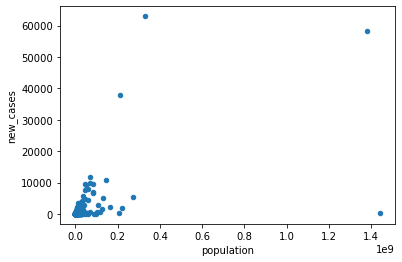

In [8]:
world_df = (raw_df[raw_df['iso_code'].str.contains('OWID')==False][['iso_code','new_cases','population']]).groupby('iso_code').mean() #remove regional values
#world_df = np.log(world_df) #scaling to log10
world_df = world_df.dropna() #removing NAs; required by pearsonr
world_df = world_df[world_df['new_cases']>=0] #removing negative values
world_df.plot.scatter(x='population',y='new_cases',figsize=(6,4)) 
print("R:",stat.pearsonr(world_df['population'].tolist(),world_df['new_cases'].tolist())[0])
print(world_df[['population','new_cases']].sort_values(by='population',ascending=False))

<AxesSubplot:xlabel='total_vaccinations', ylabel='new_vaccinations'>

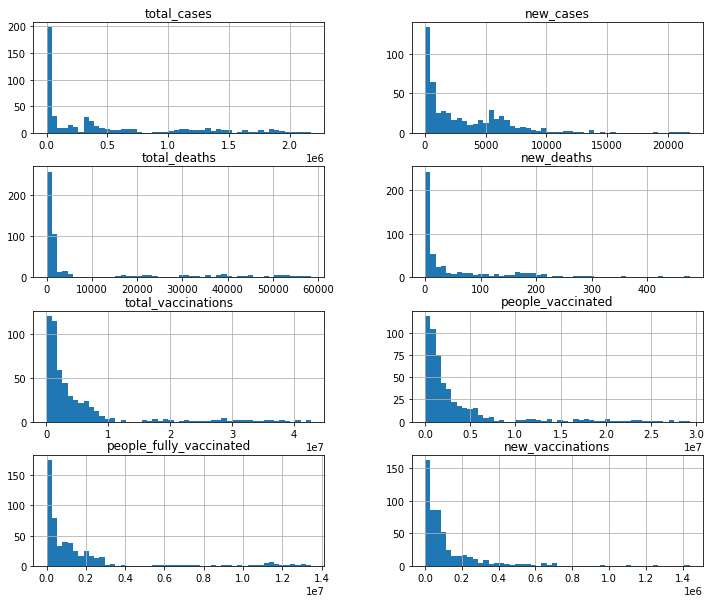

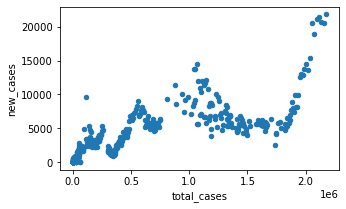

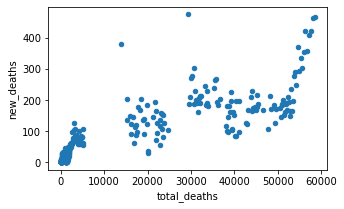

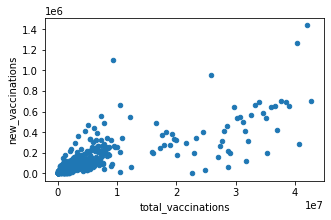

In [9]:
col = toRetainData[:8]
s = covid_df[col]
s = s.dropna()
s.hist(column=col,bins=50,layout=(4,2),figsize=(12,10))
s.plot.scatter(x='total_cases',y='new_cases',figsize=(5,3))
s.plot.scatter(x='total_deaths',y='new_deaths',figsize=(5,3))
s.plot.scatter(x='total_vaccinations',y='new_vaccinations',figsize=(5,3))

The display shows the potential distribution (albeit skewed more to the right) of the values per variable on a graph as well as a scatter graph showing the total to new relationship of the data. It could be seen in the scatter graph that the shape of the scatter graph for cases and deaths are quite similar but should not be taken immediately as causative of each other.

It could be noticed that there are some outliers in the scatter graph which are probably caused by delayed reporting by different government's COVID-19 statistics team. As an example, there was a report in the USA where spikes in death numbers relating to COVID-19 were reported which by huge data dumping at a certain time (O'Neill, J., 2021). 

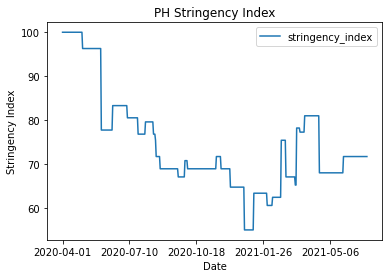

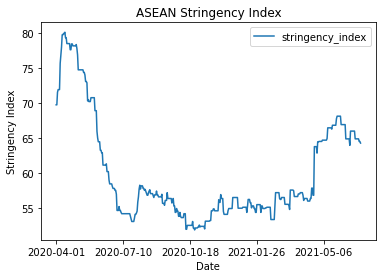

In [10]:
ph_stringencyGraph = createCountryLineChart(covid_df,'PHL', 'date', 'stringency_index', 'Date', 'Stringency Index', 'PH Stringency Index')
asean_stringencyGraph = createCountryLineChart(group_df,'MDL_SEA', 'date', 'stringency_index', 'Date', 'Stringency Index', 'ASEAN Stringency Index')

The graph above shows the stringency of governments of the Philippines and as well as for the overall of the ASEAN using the Stringency Index. It could be observed that the Philippines retained its stringency well above the ASEAN average on the same period, this is despite the trend (i.e. the shape of the graph) being near similar to each other for reasons of easing up for the recovery of their economies.

**EDA Questions:**<br>
1. Do case trends (new_cases) in the Philippines differ to ASEAN every month period.
2. Is there a correlation between the new cases to new deaths?
3. Do case numbers correlate negatively with the number of people being vaccinated?

**1. Do case trends (new_cases) in the Philippines significantly differ to other ASEAN nations on a monthly average?**<br>

The following code block will find the respective CI values of the Philippines' new cases per month and will compare it to the overall new cases reported by all of ASEAN member nations (including the Philippines).

The general formula for both population and sample size will be $s=d*n$ ($c$=country, $d$=days with report), thus the population size of ASEAN will be around $\geqslant300$ (~30 days with 10 countries) and the Philippines expected to be $~30$.

The statistical parameters will be set at 95% confidence level at a two-tailed approach.

In [11]:
def findMonthlyNewCases(df,grouping,mode,asDataFrame): #REFACTORED CODE BY JASON FOR REUSABILITY
    df.groupby('iso_code')
    df['date'].str[:7]
    df = df.assign(year_month = df['date'].str[:7])
    list = df.groupby(grouping).new_cases.agg(mode)
    if asDataFrame:
        return pd.DataFrame(list).reset_index()
    else:
        return list

#Add a "year_month" column based on "date" column
df_indiv_monthly_totals = findMonthlyNewCases(covid_df,['iso_code','year_month'],['sum','mean','std'],True) #per ASEAN member country
df_ph_monthly_totals = findMonthlyNewCases(ph_df,['iso_code','year_month'],['sum','mean','std'],True) #Philippines

print("ASEAN Nation's Monthly New Cases:\n",df_indiv_monthly_totals[df_indiv_monthly_totals['year_month']=='2021-01'],"\n")

ASEAN Nation's Monthly New Cases:
     iso_code year_month       sum          mean          std
9        BRN    2021-01      23.0      0.741935     2.756420
24       IDN    2021-01  335116.0  10810.193548  2243.934081
39       KHM    2021-01      88.0      2.838710     3.777978
54       LAO    2021-01       3.0      0.096774     0.538816
69       MMR    2021-01   15515.0    500.483871   106.496908
84       MYS    2021-01  101949.0   3288.677419  1028.919187
99       PHL    2021-01   51554.0   1663.032258   419.111559
114      SGP    2021-01     937.0     30.225806    10.828080
129      THA    2021-01   12455.0    401.774194   375.267346
144      VNM    2021-01     352.0     11.354839    26.336981 



<AxesSubplot:title={'center':'mean'}, xlabel='year_month'>

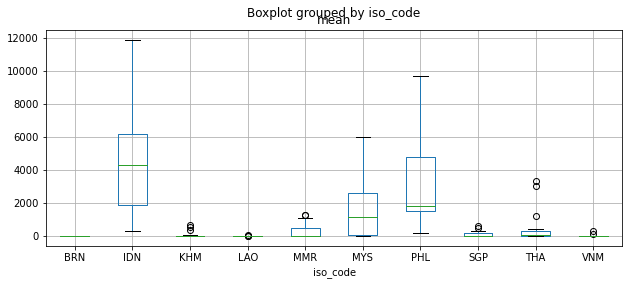

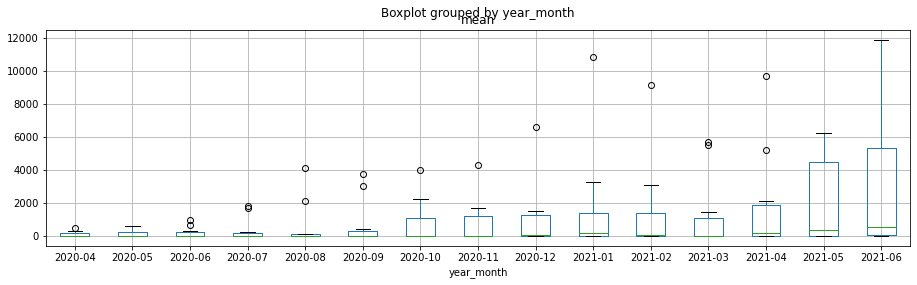

In [12]:
#VISUALIZATION
df_indiv_monthly_totals.boxplot("mean", by="iso_code", figsize=(10,4),autorange=True) #new_cases mean per iso_code
df_indiv_monthly_totals.boxplot("mean", by="year_month", figsize=(15,4),autorange=True) #new_cases mean per year_month

The visualization shows ranges of the monthly average of new cases of COVID-19 being reported by every nation in the ASEAN. Based from the visualization, the top 3 countries with the highest monthly average of new cases are the **Indonesia, the Philippines, and Malaysia**. This is despite of the countries increasing vaccination rate as shown in the third graph but it seems that it is not enough given the population of the Philippines of around 109 million people (Mapa, 2021). The boxplot also shows that there are potential outliers in the data shown, however this could be considered more of a spike in cases rather than an outlier but it must be considered as well that **governments may have done changes on their method of recording or reporting amidst the timeline, or may have made mistakes on their reported new case numbers** that may have caused the supposed outliers.

From the results, the month of July 2021 will be ommitted given that the lower and upper confidence intervals are NaN, because the only value available there is the 1st of July, as the result of date synchronization that was done in data cleaning. Additionally the resulting NaN is caused by the fact that $n=1$ and $std=\sqrt{ \frac{ \sum x-x^{2} }{n-1} }$ with $n-1$ resulting to $0$.

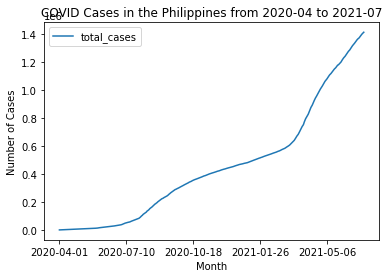

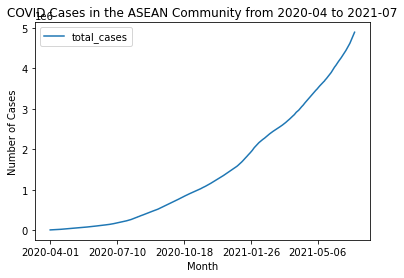

In [13]:
createCountryLineChart(covid_df, "PHL", "date", "total_cases", "Month", "Number of Cases", "COVID Cases in the Philippines from 2020-04 to 2021-07")
createCountryLineChart(group_df,"MDL_SEA","date","total_cases", "Month", "Number of Cases", "COVID Cases in the ASEAN Community from 2020-04 to 2021-07")

In whole, both the Philippines and ASEAN experience a definite increase in its total cases as shown in the graph above, however this does not necessarily point out that the Philippines is the sole reason for the rise of total cases in the region but rather could be only pointed out as a potential contributor to it.

**2. Is there a correlation between the new cases to new deaths?**

R Value: 0.5933530494614381


<AxesSubplot:xlabel='new_deaths', ylabel='new_cases'>

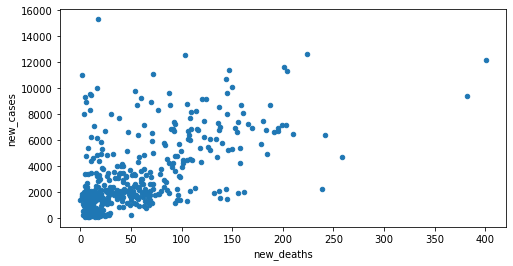

In [14]:
forCorr = ph_df[['date','new_cases','new_deaths','year_month']]
forCorr = forCorr.dropna() #pre-req for pearsonr

corr = stat.pearsonr(forCorr['new_deaths'].tolist(),forCorr['new_cases'].tolist())
print("R Value:",corr[0])
forCorr.plot.scatter('new_deaths','new_cases',figsize=(8,4)) #Philippines' New Cases to New Vaccinations Scatter Plot

This EDA questions aims to show whether there is a relationship of an economy of country and their capability to provide healthcare to their citizens.

To visually represent this, a scatter plot was decided to best show (at a glance) on how cases correlate to the number of new vaccinations being inocculated to Filipinos at the time this was made. The each corner (quadrants) of the scatter plot shows the four following scenarios:
1. Upper-Right (Quadrant 1): High Deaths, High Cases
2. Upper-Left (Quadrant 2): Low Deaths, High Cases
3. Lower-Left (Quadrant 3): Low Deaths, Low Cases
4. Lower-Right (Quadrant 4): High Deaths, Low Cases

From this, the government should aim for the **third quadrant** since it suggests that it might be possible for it to have a low death rate if there are low cases in the first place. Though it should be worth noting as well that the reports regarding new deaths come at a later period from the date of reporting a case for a person that belongs to both categories of data.

In terms of correlation, **it attained an r-value of $r=0.59$ which according to the Guildford Rule, is a moderate positive correlation (Hinkle et. al., 2003) between case and death numbers in COVID-19 which indicates that there is a valid correlation between case numbers and death numbers** to which the Philippine government to act accordingly to reduce the further number of deaths that is attributed by COVID-19.

**3. Do case numbers correlate negatively with the number of people being vaccinated?**

To visually represent this, a scatter plot was decided to best show (at a glance) on how cases correlate to the number of new vaccinations being inocculated to Filipinos at the time this was made. The each corner (quadrants) of the scatter plot shows the four following scenarios:
1. Upper-Right (Quadrant 1): High vaccination rate, High new cases
2. Upper-Left (Quadrant 2): Low vaccination rate, High new cases
3. Lower-Left (Quadrant 3): Low vaccination rate, Low new cases
4. Lower-Right (Quadrant 4): High vaccination rate, Low new cases

Ideally, governments should aim for the **fourth quadrant** scenario at should steer away from reaching either of the first two quadrants.

R Value: -0.11738150553819919


<AxesSubplot:xlabel='new_vaccinations', ylabel='new_cases'>

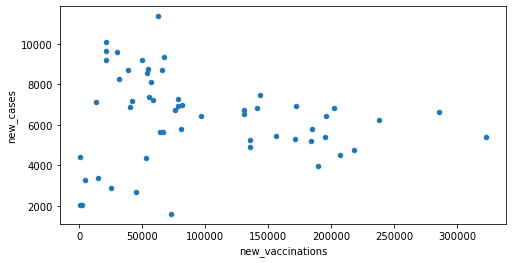

In [15]:
forCorr = ph_df[['date','new_cases','new_vaccinations','year_month']]
forCorr = forCorr.dropna() #pre-req for pearsonr

corr = stat.pearsonr(forCorr['new_vaccinations'].tolist(),forCorr['new_cases'].tolist())
print("R Value:",corr[0])
forCorr.plot.scatter('new_vaccinations','new_cases',figsize=(8,4)) #Philippines' New Cases to New Vaccinations Scatter Plot

The visualization shows that the Philippines belongs mostly on the center middle and upper left part of the scatter plot, indicating that vaccinations, for the moment, aid in reducing the number of new cases from arising. This relationship is also attributed to people following health protocols such as wearing face masks and practicing social distancing. However, the number of people vaccinated is still at 11.7M people (Kabagani, 2021), which is still tens of millions away from the target herd immunity of 70% of a country's population (Swaminathan & Gupta-Smith, 2020).

Additionally, using scipy's pearsonr(), **the data resulted to an r-value of $r=-0.12$,** which according to the Guildford Rule of Thumb is **a (negative) negligable relationship** (Hinkle et. al., 2003), but still points to a (if any) negative correlation. It could be assumed that, as of the moment, vaccinations do not yet reflect that of the expected reduction in case numbers of COVID-19 in the Philippines. This could be attributed to either:
1. Still an inefficient number of COVID-19 vaccines given the population of the country
2. Speed of innoculation (specifically the rate of full vaccinations)
3. Emergence of new COVID-19 variants
4. Weaknesses of vaccines used in certain variants (Hewings-Martin, 2021)
Furthermore, the resulting correlation could be also attributed to the still limited data regarding the Philippines' vaccination thus resulting to a negligable r-value.

For the moment, the following vaccines are currently used in the Philippines as approved by the FDA (*Emergency Use Authorization*, 2021) with the respective quantity as tracked by ABS-CBN at July 26, 2021 (*Philippines: COVID-19 Vaccine Tracker*, 2021):

|Vaccine|Quantity (Donated & Procured)|% of Vaccine Pool|
|---|---|---|
|Pfizer-BioNTech|3,410,550|11%|
|Oxford-AstraZeneca|6,858,900|22%|
|Coronavac Sinovac|17,000,000|54%|
|Sputnik V|350,000|1%|
|Janssen-J&J|3,240,850|10%|
|Bharat Biotech-Covaxin|
|Moderna|500,400|2%|
|*Novavax|

Despite this, government health departments/ministries as well as WHO do advice the public to still get vaccinated as soon as it is available since having a vaccine is far better than not having a vaccine taken in the first place.

*Notes:*
1. Novavax awaiting EUA
2. The data does not include those purchased by the private sector
3. Most vaccines require at least 2 doses for full effectivity with J&J-Janssen's vaccines requiring only 1 dose for its full effectiveness.

### 4. Research Question

**1. Is there a significant difference between the Philippines and its ASEAN neighbors in the monthly average of new COVID-19 cases?**

1. Scope in Dataset: New cases of all ASEAN nations with the Philippines being the "sample". The data will be aggregated on an average monthly basis of *new_cases* to see the monthly rate of new cases being recorded between the Philippines and ASEAN.
2. Significance: This is in order to know how the Philippines fare against COVID-19 (whether lower or higher in new case numbers) in comparison to our neighboring countries in the ASEAN as well as in the world such that if there is a significant difference. This should help us determine if the government is doing well enough action in order mitigating the risk and reducing the number of COVID-19 cases in the country.

**2. Is there a significant difference between those that received the the prescribed doses of the COVID-19 vaccine against those that only received 1 dose (specifically for 2 dose vaccines)?**<br>

1. Scope of the Data: It will make use the data that is found in *people_vaccinated* and *people_fully_vaccinated* in the dataset.
2. Significance: This question aims to determine if there are is a significant difference between people who have been vaccinated only once versus those that receive all of the prescribed doses. Another thing that must be point out that this specific question does not reflect the overall state of every government's vaccination rate in relation to their respective populations but rather does check if there are potential delays or skipping in receiving the second dose (for two-dose vaccines) in order to complete the vaccination.

### 5. Statistical Inference

**For Research Question 1:** Is there a significant difference between the Philippines and its ASEAN neighbors in the monthly average of new COVID-19 cases?<br>

$H_0 = $ There is no difference between the Philippines and its ASEAN neighbors on their monthly average of new COVID-19 cases.<br>
$H_A = $ There is a difference between the Philippines and its ASEAN neighbors on their monthly average of new COVID-19 cases.

For this research question, the confidence interval was first checked in order to determine on where the Philippines is in terms of new COVID-19 cases against its neighbors in the ASEAN region.

The statistical parameters set for this as well as for succeeding tests are:
- Confidence Level = 95%
- Significance Level = 5%

The sampling method for this question is purposive sampling, with its purpose of only determining how the Philippines is doing in relation to its neighbors in the association.

In [16]:
#CONFIDENCE INTERVAL LEVELS FOR VISUAL CHECKING
year_month = (covid_df['date'].str[:7]).unique().tolist()

def margin_error(z,std,n): #(z_val, sample_std, sample_size)
    return z*(std/math.sqrt(n))
def CI(m, e): #(sample_mean,sample_mgerr)
    return [m-e,m+e]

#statistical parameters
confidence = 0.95
significance = 1-confidence
z_val = stat.norm.ppf(1-significance/2) #two-tail; remove '/2' if one-tailed
print("Confidence Value:",confidence)
print("Z-Val:",z_val)

#placeholders; for visualization purposes
lo_ci=[]; hi_ci=[]
asean_monthly=[]; ph_monthly=[]

#pre-statistical treatment
neighbor_df = covid_df[covid_df['iso_code']!='PHL'] #ASEAN neighbors only, don't include the Philippines
for i in range(len(year_month)):
    #dataframes to use
    asean_date_df = (neighbor_df[neighbor_df['date'].str.contains(year_month[i])]).reset_index()
    ph_date_df = (ph_df[ph_df['date'].str.contains(year_month[i])]).reset_index()
    #aggregations
    asean_agg_df = asean_date_df.agg({'new_cases':['mean','std']})#population
    ph_agg_df = ph_date_df.agg({'new_cases':['mean','std']})#sample
    asean_monthly.append(asean_agg_df['new_cases']['mean']) #list of pop means
    ph_monthly.append(ph_agg_df['new_cases']['mean'])
    n=ph_date_df.shape[0]
    err=margin_error(z_val,asean_agg_df['new_cases']['std'],n)#margin of error
    ci=CI(asean_agg_df['new_cases']['mean'],err)
    lo_ci.append(ci[0]); hi_ci.append(ci[1])

treated = {'year_month':year_month,'lo_ci':lo_ci,
           'asean_monthly':asean_monthly,'ph_monthly':ph_monthly,
           'hi_ci':hi_ci
          }

ph_asean_ncase_df = pd.DataFrame(treated,columns=['year_month','lo_ci','ph_monthly','hi_ci','asean_monthly'])
ph_asean_ncase_df['in_range'] = np.where((ph_asean_ncase_df['lo_ci']<= ph_monthly)&(ph_asean_ncase_df['hi_ci'] >= ph_monthly),'Within','Not Within')
ph_asean_ncase_df['in_range'].value_counts()

Confidence Value: 0.95
Z-Val: 1.959963984540054


Not Within    12
Within         3
Name: in_range, dtype: int64

R: ASEAN Neighbor LoCI
G: PH Mean
B: ASEAN Neighbor HiCI
Y: ASEAN Neighbor Mean


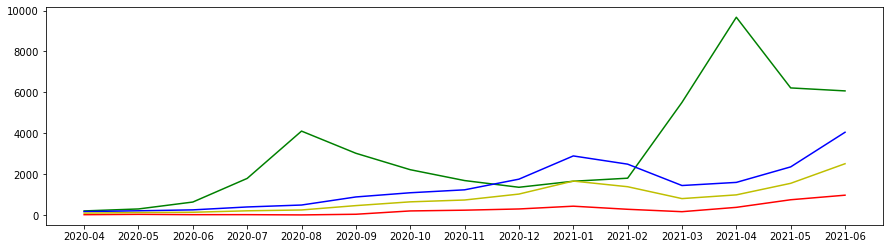

In [17]:
#PLOTTING CONFIDENCE INTERVAL LEVELS ALONGSIDE ASEAN NEW CASE MEAN
plt.figure().set_figwidth(15)
def prepLineGraph(x,y,c): #Referenced from https://www.geeksforgeeks.org/matplotlib-pyplot-axvline-in-python/
    plt.plot(x,y,color=c)

print("R: ASEAN Neighbor LoCI\nG: PH Mean\nB: ASEAN Neighbor HiCI\nY: ASEAN Neighbor Mean")
prepLineGraph(ph_asean_ncase_df['year_month'].tolist(),ph_asean_ncase_df['lo_ci'].tolist(),'r')
prepLineGraph(ph_asean_ncase_df['year_month'].tolist(),ph_asean_ncase_df['ph_monthly'].tolist(),'g')
prepLineGraph(ph_asean_ncase_df['year_month'].tolist(),ph_asean_ncase_df['hi_ci'].tolist(),'b')
prepLineGraph(ph_asean_ncase_df['year_month'].tolist(),ph_asean_ncase_df['asean_monthly'].tolist(),'y')

Based from the resulting confidence intervals and its subsequent graph, it could be well determined that the Philippines is above the average of ASEAN in new cases of COVID-19, with only time of us being well within the average during December 2020 to February 2021. 

To further expound this initial claim, an **independent t-test (unpaired values) will be conducted with the same data to determine if there are any significant differences between the averages of the Philippines and its ASEAN neighbors.** The Philippines was excluded from the group of ASEAN in this study to assess how do we perform as a country inrelation to our neighbors and for this, scipy's *ttest_ind()* was used. According to scipy's documentation, this test is a two sided test where the null hypothesis is that the two independent samples have identical average values and the alternative states otherwise.

In [18]:
#Individual T-Test (Dependent via ttest_ind)
ttestResult = stat.ttest_ind(ph_asean_ncase_df['asean_monthly'],ph_asean_ncase_df['ph_monthly']) #TTest for Related 
print("t-Test P-Value:",ttestResult.pvalue)
print("Significance:",significance)
print("t-Test < Significance: ", ttestResult.pvalue<significance)

t-Test P-Value: 0.004217077165980127
Significance: 0.050000000000000044
t-Test < Significance:  True


Since the return value of the p-value is $p=0.004$ which is less than the significance value of $\alpha=0.05$. Thus, $H_0$ is rejected, therefore there is **a significant difference between the monthly average new case numbers of the Philippines and its ASEAN neighbors as a whole on a monthly basis** which equitably reflects the graph shown prior.

**For Research Question 2:** Is there a significant difference between those that received the the prescribed doses of the COVID-19 vaccine against those that only received 1 dose (specifically for 2 dose vaccines)?<br>

$H_0 = $ There is no significant difference between fully vaccinated and vaccinated people.<br> 
$H_A = $ There is a significant difference between fully vaccinated and vaccinated people.<br>

The requirement for statistical inference for categorical data is that all totals of the category must be equal on all groups involved. In this case the 'groups' are the individual countries in ASEAN, and the 'categories' are whether the people people that received the vaccine only received one dose or both doses.

To do this, another column has to be made in the DataFrame (*covid_df*) in order to determine the first dose only vaccinations that have been conducted to a country's population afterwhich another column is then made to determine as to what is more prominent in terms of the vaccination stage from the population that was vaccinated. Effectively there are already categories in the list whether the country has reached vaccinees that belong more Full Vaccinations or Partial Vaccinations.

<AxesSubplot:title={'center':'people_fully_vaccinated'}, xlabel='iso_code'>

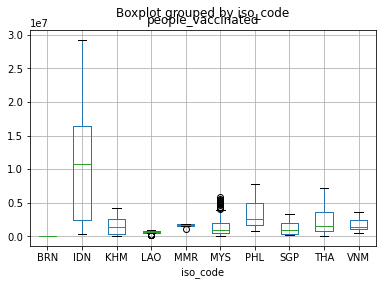

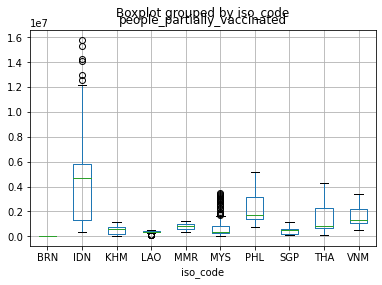

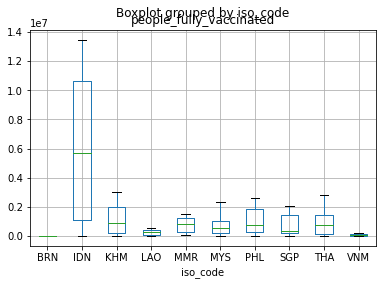

In [19]:
vacc_df = covid_df[(covid_df['people_vaccinated'].notna())&(covid_df['people_fully_vaccinated'].notna())] #removing zero-valued vaccinations
vacc_df = vacc_df.assign(people_partially_vaccinated = lambda x: x['people_vaccinated']-x['people_fully_vaccinated']) #based on owid's graph implying
vacc_df['vacc_state'] = np.where(vacc_df['people_partially_vaccinated']>vacc_df['people_fully_vaccinated'],'Partial','Full')
vacc_df.boxplot('people_vaccinated',by='iso_code',figsize=(6,4))
vacc_df.boxplot('people_partially_vaccinated',by='iso_code',figsize=(6,4))
vacc_df.boxplot('people_fully_vaccinated',by='iso_code',figsize=(6,4))

For the most part, certain countries still have outliers even after removal of the zero values are done.

In [20]:
sizes = vacc_df['iso_code'].value_counts()
print(sizes)
print("median:",sizes.median())
vacc_df[vacc_df['iso_code']=='PHL'][['iso_code','people_partially_vaccinated','people_fully_vaccinated','vacc_state']].head(5)

KHM    124
MYS    123
IDN    121
THA     89
PHL     53
LAO     44
BRN     37
VNM     36
SGP     25
MMR      5
Name: iso_code, dtype: int64
median: 48.5


,iso_code,people_partially_vaccinated,people_fully_vaccinated,vacc_state
73936,PHL,736225.0,1344.0,Partial
73942,PHL,797757.0,28850.0,Partial
73943,PHL,821528.0,50685.0,Partial
73948,PHL,875068.0,132288.0,Partial
73949,PHL,904215.0,149041.0,Partial


The results above show that the vacc_df will only be limited to 49 entries of samples with the *replace* parameter being set to **True** in order to compensate for the missing available data on the country of Myanmar.

The value of 49 was attained by using the median of the remaining available sizes of vaccine data from the 10 ASEAN countries.

In [21]:
def getSample(src_df, group_list, n):
    single = []; full = []
    for i in range(len(group_list)):
        df = src_df[src_df['iso_code']==group_list[i]].sample(n,replace=True)['vacc_state'].value_counts() #random sample by country
        for i in range(df.index.size):
            if(df.index[i] == 'Full'):
                full.append(df['Full'])
            if(df.index[i] == 'Partial'):
                single.append(df['Partial'])
        if len(single)<len(full):
            single.append(0)
        elif len(single)>len(full):
            full.append(0)
    return [single,full]
def state(a,b):
    if a<b:
        return "Full"
    return "Partial"

c = getSample(vacc_df,vacc_df['iso_code'].unique().tolist(),49)
single_vacc = c[0].copy()
full_vacc = c[1].copy()

print("covid_df iso_code:",vacc_df['iso_code'].unique())
for i in range(vacc_df['iso_code'].unique().size):
    print(vacc_df['iso_code'].unique().tolist()[i],":",single_vacc[i],",",full_vacc[i],",",state(single_vacc[i],full_vacc[i]))

combined = [single_vacc,full_vacc]
#will make use of this: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chi2_contingency.html
chi = stat.chi2_contingency(combined)
print("\nchi2:",chi[0])
print("pval:",chi[1],"< 0.05 =",chi[1]<0.05)
print("dof:",chi[2])#should be 9 since df=(categories-1)(groups-1)=(2-1)(10-1)=1*9=9; 2categories, 10groups

#print("     partially vaccinated , fully vaccinated")
#for i in range(vacc_df['iso_code'].unique().size):
#    print(vacc_df['iso_code'].unique().tolist()[i],"=",chi[3][0][i],",",chi[3][1][i])

covid_df iso_code: ['BRN' 'KHM' 'IDN' 'LAO' 'MYS' 'MMR' 'PHL' 'SGP' 'THA' 'VNM']
BRN : 49 , 0 , Partial
KHM : 15 , 34 , Full
IDN : 26 , 23 , Partial
LAO : 33 , 16 , Partial
MYS : 22 , 27 , Full
MMR : 20 , 29 , Full
PHL : 49 , 0 , Partial
SGP : 17 , 32 , Full
THA : 46 , 3 , Partial
VNM : 49 , 0 , Partial

chi2: 169.9566063145294
pval: 6.300407071451789e-32 < 0.05 = True
dof: 9


The resulting p-value is less than the significance value of $0.05$ which equates to the rejection of $H_0$, therefore **there is a significant difference between those that are vaccinated in once to those that have received the recommended dosage prescribed by the vaccine manufacturer**. For the most part however, it should be considered that there will be a time that it may say that it is significantly different on the context of having a higher number of fully vaccinated than those who just received a single dose, which could indicate that the governments of these countries are approaching their full vaccination numbers more so than those people who are just receiving their first dose.

*Note:*
The values between full and partial vaccination states may change from run-to-run which can also affect the exact value of the $chi^{2}$ and the $p-val$, but it would always be certain that the p-value is less than the significance value of $0.05$

### 6. Insights and Conclusions

- Insight and Conclusion 1:

    COVID-19 has brought about a massive change in the lives of all people including the people of member nations of ASEAN. It has caused tens of thousands of deaths in the region. It also brought about a big dent on the country's economy due to the lockdowns imposed by the government in order to curb the spread of COVID-19.

    In terms of the case numbers, **it was determined that there was a significant difference in the monthly average of reported new cases in the Philippines in comparison to ASEAN.** This causes could be attributed to new variants that are spreading throughout the world, including the ASEAN region, and the continous reduction of every government's stringency for the purposes of allowing the economy to function back in near pre-COVID levels in order to recoup the losses made during last three quarters of 2020. With this however, the public is still well encouraged to stringently abide by the health protocols as well as taking the opportunity of having oneself be vaccinated as this are only the scientifically sound ways of dealing and eventually eradicating the virus.
    
    Furthermore, certain reports do note that while vaccinations play a role in erradicating the virus, not all vaccines are of equal effectiveness where some are effective in all potential variants and some are not. Additionally, the rate to which people are vaccinated does also play a big role in reducing case numbers since the name of the game is catching the virus (prevention, isolation, and vaccination) before it mutates into a much stronger variant or strain of the same virus.
<br>
- Insight and Conclusion 2:

    As aforementioned, there is a significant difference in the average of newly reported cases in the Philippines compared to that of the whole of the ASEAN. However, that only assumes the ASEAN as one whole entity; not comparing the Philippines to its neighbors individually. Comparing the Philippines to its neighbors, one could observe that its number of cases follow a trend which is distinct to its neighbors in the ASEAN (see EDA). We had a spike of cases in July to September 2020, then a sudden immergence of cases in around April 2021. According to an interview of CNN Philippines (2021) with infectious diseases expert, Dr. Anna Ong-Lim, the reason of the sudden increase of cases back in April was because compared to other countries, the Philippines did not have a comprehensive contact tracing system. She then added that people's movement should had been limited to reduce the number of new cases, which it was. During the Holy Week (March 29 - April 4), the Philippines was put under enhanced community quarantine, which could explain how there was a drop in cases as the days progressed to May.

    When vaccines started becoming available in the Philippines, there was unfortunately a percentage of vaccinees who did not complete their prescribed number of doses. An article of the Philippine Star by Crisostomo, 2021, states that according to the Interagency Task Force (IATF), out of 3,101,559 vaccinees, only 1.07 million came back to recieve their second dose. Going back to Research Question 2, we could see that there is a significant difference between those who have been vaccinated only once to those who were vaccinated more than once, depending on the prescribed dosage of the manufacturer of the vaccine. Therefore, it could be implied that the Philippines is on par with the world in this regard.

    Based from the tests performed, it is suggested that there is a significant difference between those who have received one dose of a COVID vaccine and those who have received both doses. The pace of vaccinations are still on the rise in most ASEAN countries as reflected by the data. With more vaccines arriving in the individual countries in the following months, the difference between the partially vaccinated and the fully vaccinated would hopefully lean towards those who have received the recommended two doses. Among the possible factors that would have an effect on these statistics would be individual's willingness to receive their second dose, as well as those who are hesitant to even get a single vaccination.

### Sources
- CNN Philippines. PH logs new all-time high of nearly 10,000 single-day rise in COVID-19 cases. (2021, March 26). https://www.cnnphilippines.com/news/2021/3/26/PH-nearly-10-000-new-covid-cases.html
- Crisostomo, S. 50% of vaccinees miss second dose – IATF expert. (2021, June 3). https://www.philstar.com/headlines/2021/06/03/2102705/50-vaccinees-miss-second-dose-iatf-expert
- Emergency Use Authorization. Food and Drug Administration - Philippines. (2021, July 11). https://www.fda.gov.ph/list-of-fda-issued-emergency-use-authorization/.
- Hewings-Martin, Y. (2021). COVID-19: Which vaccines are effective against the delta variant? Retrieved from: https://www.medicalnewstoday.com/articles/covid-19-which-vaccines-are-effective-against-the-delta-variant
- Hinkle, D. E., Wiersma, W., & Jurs, S. G. (2003). Applied Statistics for the Behavioral Sciences. Boston, MA: Houghton Mifflin Company.
- Kabagani, L.J. (2021). Over 11.7M now vaccinated in PH. Retrieved from https://www.pna.gov.ph/articles/1146011
- Mapa, D. S. (2020). Highlights of the Population Density of the Philippines 2020 Census of Population and Housing (2020 CPH). Retrieved from: https://psa.gov.ph/population-and-housing/node/164857
- Mathieu, E., Ritchie, H., Ortiz-Ospina, E. et al. A global database of COVID-19 vaccinations. Nat Hum Behav (2021)
- O'Neill, J. (2021). Massive spike in reported increase of COVID-19 deaths was skewed by old data. Retrieved from: https://nypost.com/2021/07/31/spike-in-reported-increase-of-covid-19-deaths-skewed-by-old-data/
- Parrocha, A. (2021). Delta, Lambda Covid-19 variants cause of concern: PRRD. Retrieved from https://www.pna.gov.ph/articles/1146832
- Philippines: COVID-19 Vaccine Tracker. (2021). Retrieved from: https://news.abs-cbn.com/spotlight/multimedia/infographic/03/23/21/philippines-covid-19-vaccine-tracker
- Swaminathan, S. & Gupta-Smith, V. (2020). Episode #1 - Herd immunity. Retrieved from: https://www.who.int/emergencies/diseases/novel-coronavirus-2019/media-resources/science-in-5/episode-1
- Tracking SARS-CoV-2 variants. (2021). Retrieved from: https://www.who.int/en/activities/tracking-SARS-CoV-2-variants/